<a href="https://colab.research.google.com/github/cluePrints/data-sci-fience/blob/master/food_101_CutMix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
pip install wandb -q

     |████████████████████████████████| 1.3MB 37.4MB/s 
     |████████████████████████████████| 102kB 34.9MB/s 
     |████████████████████████████████| 450kB 36.7MB/s 
     |████████████████████████████████| 235kB 55.2MB/s 
     |████████████████████████████████| 92kB 30.7MB/s 
     |████████████████████████████████| 71kB 22.4MB/s 
     |████████████████████████████████| 71kB 27.1MB/s 
     |████████████████████████████████| 256kB 50.9MB/s 
     |████████████████████████████████| 184kB 54.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [6]:
import wandb

[autoreload of dateutil.tz.tz failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name '_tzinfo'
]
[autoreload of dateutil.rrule failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ValueError: __init__() requires a code object with 0 free vars, not 1
]


In [7]:
wandb.init(project='XXX-early-init')

wandb: ERROR Not authenticated.  Copy a key from https://app.wandb.ai/authorize


API Key: ··········
Appending key for api.wandb.ai to your netrc file: /root/.netrc
W&B Run: https://app.wandb.ai/soboleiv/XXX-early-init/runs/bove8px5
Call `%%wandb` in the cell containing your training loop to display live results.


W&B Run: https://app.wandb.ai/soboleiv/XXX-early-init/runs/bove8px5

In [8]:
from fastai import datasets
path = datasets.untar_data(url=datasets.URLs.FOOD)
path

PosixPath('/root/.fastai/data/food-101')

In [0]:
from fastai.vision import *
apple_pie = open_image(f'{path}/images/apple_pie/1005649.jpg')
baklava = open_image(f'{path}/images/baklava/1006121.jpg')

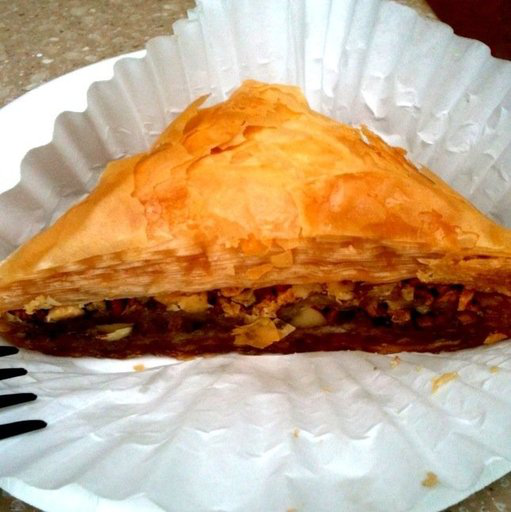

In [10]:
baklava

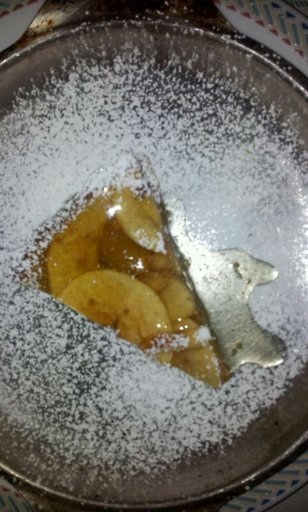

In [11]:
apple_pie

In [12]:
type(apple_pie)

fastai.vision.image.Image

In [13]:
      """
        import pdb; pdb.set_trace()
       ](Pdb) type(last_input)
        <class 'torch.Tensor'>
        (Pdb) type(last_target)
        <class 'torch.Tensor'>
        (Pdb) last_input.shape
        torch.Size([1024, 3, 32, 32])
        (Pdb) last_target.shape
        torch.Size([1024, 3])"""
type(apple_pie.data), apple_pie.data.shape, baklava.data.shape

(torch.Tensor, torch.Size([3, 512, 308]), torch.Size([3, 512, 511]))

In [0]:
import torch
batch = torch.cat([baklava.data[:,0:512,0:308].unsqueeze(0), apple_pie.data[:,0:512,0:308].unsqueeze(0)])

In [15]:
batch.size()

torch.Size([2, 3, 512, 308])

In [0]:
examples_count, channels_count, height, width = batch.size()

In [0]:
dest_example_idx, src_example_idx = torch.randperm(examples_count)[:2]
λ = tensor(0.75)
start_col = torch.randint(width, tuple())
start_row = torch.randint(height, tuple())
region_w = width * torch.sqrt(1 - λ)
region_h = height * torch.sqrt(1 - λ)
end_col = start_col + region_w.int()
end_row = start_row + region_h.int()

batch[dest_example_idx,:,start_row:end_row,start_col:end_col] = batch[src_example_idx,:,start_row:end_row,start_col:end_col]
#new_target_y = target[dest_example_idx] + target[src_example_idx] * (1 - λ)

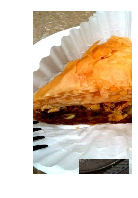

In [18]:
import matplotlib.pyplot as plt
show_image(batch[dest_example_idx])

# See what data layout looks like

## File layout

## Load meta & check distribution of classes

TLDR: no immediate need for up/down sampling

In [0]:
from collections import defaultdict
import pandas as pd
import json

# TODO: switch to pytest or the like and get testcases and such
def test_eq(expected, actual, subject="something", reason="Expected {subject} to eq {expected} got {actual}"):
  assert expected == actual, reason.format(expected=expected, actual=actual, subject=subject)

def json_file_to_df(file_stem):
  assert '.' not in file_stem

  with open(f"{path}/{file_stem}.json") as json_file:
    parsed_json = json.loads(json_file.read())
  
  split_label = file_stem
  series = defaultdict(list)
  for class_name, image_path_prefixes in parsed_json.items():
    for prefix in image_path_prefixes:
      series['class_label'].append(class_name)
      series['split_label'].append(split_label)
      series['path'].append(prefix)
    
  return pd.DataFrame(series)

train_df = json_file_to_df('train')
test_eq(101,   len(train_df['class_label'].unique()), "training classes imported")
test_eq(75750, len(train_df),                         "training examples imported")

In [20]:
train_class_stats = train_df['class_label'].value_counts().describe()
train_class_stats

count    101.0
mean     750.0
std        0.0
min      750.0
25%      750.0
50%      750.0
75%      750.0
max      750.0
Name: class_label, dtype: float64

In [0]:
test_df = json_file_to_df('test')
test_eq(101,   len(test_df['class_label'].unique()), "validation classes imported")
test_eq(25250, len(test_df),                         "validation examples imported")

In [22]:
valid_class_stats = test_df['class_label'].value_counts().describe()
valid_class_stats

count    101.0
mean     250.0
std        0.0
min      250.0
25%      250.0
50%      250.0
75%      250.0
max      250.0
Name: class_label, dtype: float64

In [0]:
test_eq(valid_class_stats[0],  train_class_stats[0],                    "class counts")
test_eq((valid_class_stats[1:] - train_class_stats[1:]/3).any(), False, "class distributions delta")

# Select a balanced sample and explore by fitting something (c)

In [0]:
# 1/15 to start with, not touching test ('actual' validation) to prevent overfitting when experimenting with models
def balanced_sample(df, trn_examples_per_class=50, val_examples_per_class=25):
  assert trn_examples_per_class + val_examples_per_class <= 750
  train_sample = train_df.groupby('class_label').head(trn_examples_per_class).copy()
  train_sample['split_label'] = 'sample_train'

  # start from the tail so we're always using roughly the same stuff for validation purposes even if I change my mind and use less/more
  valid_sample = train_df.groupby('class_label').tail(val_examples_per_class).copy()
  valid_sample['split_label'] = 'sample_valid'
  
  sample = pd.concat([train_sample, valid_sample])
  sample_idx_trn = (sample['split_label'] == 'sample_train')
  sample_idx_val = (sample['split_label'] == 'sample_valid')
  
  return (sample, sample_idx_trn, sample_idx_val)
  
sample, sample_idx_trn, sample_idx_val = balanced_sample(train_df, trn_examples_per_class=50, val_examples_per_class=25)
test_eq(101*50, sample_idx_trn.sum(), 'train examples')
test_eq(101*25, sample_idx_val.sum(), 'valid examples')
test_eq(50, (sample[sample_idx_trn]['class_label'] == 'beef_carpaccio').sum(), 'beef_carpaccio train examples')
test_eq(25, (sample[sample_idx_val]['class_label'] == 'churros').sum(),        'churros validation examples')

## Overfit to a subset of data

This tests the basic pipeline + if arch we start from is capable of representing the data well enough

In [0]:
from fastai.vision import *

In [0]:
def databunch(img_size=32, batch_size=16, trn_examples_per_class=10, val_examples_per_class=5, tfms=None):
  sample, sample_idx_trn, sample_idx_val = balanced_sample(train_df, trn_examples_per_class, val_examples_per_class)
  image_paths_list = ImageList.from_df(df=sample, path=path, folder='images', cols='path', suffix='.jpg')
  split_list = image_paths_list.split_by_idxs(sample_idx_trn.values, sample_idx_val.values)
  label_list = split_list.label_from_df(cols='class_label')
  databunch = label_list.transform(size=img_size, tfms=tfms).databunch(bs=batch_size).normalize(imagenet_stats)
  return databunch

In [27]:
# Note to self: I can get up to 8 full-res images in a batch, so have to figure out how to train well with that sort of sampling
# got to 0.31 in first epoch on full DS 64x64, batch_size=8, LR=1e-3, 700ex
# got to 0.30 in 5 epochs    on 1/10 DS 64x64, batch_size=8, LR=1e-3, 70ex (didn't improve after 10 epochs )
data = databunch(img_size=64, batch_size=8, trn_examples_per_class=70, val_examples_per_class=5)
learner = cnn_learner(data, models.resnet50, metrics=[accuracy])
#learner.fit(10, 1e-3, callbacks=[savemodel])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 76512725.06it/s]


In [0]:
from fastai.callbacks import *
#MixUpCallback??
#MixUpLoss??l

In [0]:
class CutMixCallback(LearnerCallback):
    def __init__(self, learn:Learner, probability=0.1):
      super().__init__(learn)
      self.probability = probability
      assert probability > 0 and probability <= 1

    def on_train_begin(self, **kwargs):
      return
      if self.stack_y: self.learn.loss_func = MixUpLoss(self.learn.loss_func)
        
    def on_batch_begin(self, last_input, last_target, train, **kwargs):
      if not train: return

      examples_count, channels_count, height, width = last_input.size()
      dest_example_idx, src_example_idx = torch.randperm(examples_count)[:2]
      λ = torch.rand(tuple())
      start_col = torch.randint(width, tuple())
      start_row = torch.randint(height, tuple())
      region_w = width * torch.sqrt(1 - λ)
      region_h = height * torch.sqrt(1 - λ)
      end_col = start_col + region_w.int()
      end_row = start_row + region_h.int()

      last_input[dest_example_idx,:,start_row:end_row,start_col:end_col] = last_input[src_example_idx,:,start_row:end_row,start_col:end_col]
      last_target[dest_example_idx] = last_target[dest_example_idx]*λ + last_target[src_example_idx]*(1-λ)
      # Note to self: images will show up nicely in Files tab <3. This blows up number of iterations 
      #wandb.log({"cutmix": [wandb.Image(last_input[dest_example_idx], caption="Label")]})
      return {'last_input': last_input, 'last_target': last_target}  
    
    def on_train_end(self, **kwargs):
        return
        if self.stack_y: self.learn.loss_func = self.learn.loss_func.get_old()

In [0]:
from fastai.basic_train import Learner
if not hasattr(Learner, '_load'):
  Learner._load = Learner.load
  Learner._save = Learner.save
  
def save_to_drive(self, name, **kwargs):
  self._save(f'/content/gdrive/My Drive/kaggle/food-101/{name}', **kwargs)

def load_from_drive(self, name, **kwargs):
  self._load(Path(f'/content/gdrive/My Drive/kaggle/food-101/{name}', **kwargs))

Learner.load = load_from_drive
Learner.save = save_to_drive

class WandbReporterCallback(LearnerCallback):
  def __init__(self, learn:Learner, experiment):
    self.learn = learn
    self.experiment = experiment
    self.best_accuracy = 0
    self.best_loss = None
    self.best_accuracy_epoch = None
    self.iteration = 0
    self.watch_called = False

  def on_train_begin(self, **kwargs):
    wandb.watch_called = False
    if not self.watch_called:
      self.watch_called = True
      wandb.watch(self.learn.model, log='all')
    else:
      print("[WARN] not watching the model - already being captured")
      
    self._init_metric_persistence()
    
  def on_batch_end(self, **kwargs):
    if not self.experiment.do_persist_metrics:
      return

    self.iteration = kwargs['iteration']
    # Note to self %%wandb doesn't seem to work, tracking without commiting looks not very useful to me otherwise
    wandb.log({'batch_loss': kwargs['last_loss'].item(),
               'num_batch': kwargs['num_batch'],
               'iteration': kwargs['iteration']},
             commit=True)

  def on_epoch_end(self, **kwargs):
    if not self.experiment.do_persist_metrics:
      return

    epoch = kwargs['epoch']
    last_vals = kwargs['last_metrics']
    last_loss = last_vals[0]    
    last_accuracy = last_vals[1].item()
    train_loss = kwargs['smooth_loss'].item()
    first_time = (self.best_accuracy == 0)
    if first_time or (self.best_accuracy < last_accuracy):
      self.best_accuracy_epoch = epoch
      self.best_accuracy = last_accuracy

    if first_time or (self.best_loss > last_loss):
      self.best_loss_epoch = epoch
      self.best_loss = last_loss

    wandb.log({'loss': last_loss, 'accuracy': last_accuracy,
               'epoch': epoch,
               'train_loss': train_loss,
               'best_accuracy': self.best_accuracy, 
               'best_loss': self.best_loss,
               'best_accuracy_epoch': self.best_accuracy_epoch,
               'best_loss_epoch': self.best_loss_epoch},
             commit=False)
    
  def on_train_end(self, **kwargs):
    if not self.experiment.do_persist_metrics:
      return

    if not self.experiment.tfms:
      return

    print("Calculating tta")
    log_preds, y = self.learn.TTA()
    probs = np.exp(log_preds)
    tta_accuracy = self.learn.metrics[0](log_preds, y)
    wandb.log({'tta_accuracy': tta_accuracy})
    
  def _init_metric_persistence(self):
    if not self.experiment.do_persist_metrics:
      return

    wandb.init(project='food-101')
    wandb.config.update({'start_state': self.experiment.start_state})
    wandb.config.update({'image_size': self.experiment.image_size})
    wandb.config.update({'batch_size': self.experiment.batch_size})
    wandb.config.update({'trn_examples_per_class': self.experiment.trn_examples_per_class})
    wandb.config.update({'val_examples_per_class': self.experiment.val_examples_per_class})
    wandb.config.update({'mixup': self.experiment.mixup})
    wandb.config.update({'cutmix': self.experiment.cutmix})
    wandb.config.update({'model_func': str(self.experiment.model_name)})
    wandb.config.update({'name': str(self.experiment.name)})
    wandb.config.update({'epochs': self.experiment.epochs})
    wandb.config.update({'method': self.experiment.method})
    wandb.config.update({'tfms': self.experiment.tfms})
    lr_str = self.experiment.lr
    lr_str = listify(lr_str)
    lr_str = ','.join([f"{el:.1e}" for el in lr_str])
    wandb.config.update({'lr': lr_str})
    wandb.config.update({'trainable': self.experiment.trainable})
    last_vals = self.experiment.initial_validation_run_results
    if last_vals:
      wandb.log({'loss': last_vals[0], 'accuracy': last_vals[1].item(), 'epoch': -1}, commit=False)

class Experiment():
  def __init__(self, name=None,
               start_state=None, image_size=64, batch_size=8, trn_examples_per_class=70, val_examples_per_class=5, mixup=None, model_name='models.resnet50', epochs=5,
               trainable=-1, lr=1e-3, do_persist_metrics=True, method='fit', tfms=None, validate_init=True, cutmix=None):
    self.start_state = start_state
    self.image_size = image_size
    self.batch_size = batch_size
    self.trn_examples_per_class = trn_examples_per_class
    self.val_examples_per_class = val_examples_per_class
    self.mixup = mixup
    self.model = eval(model_name)
    self.model_name = model_name
    self.epochs = epochs
    self.trainable = trainable
    self.lr = lr
    self.name = name
    self.do_persist_metrics = do_persist_metrics
    self.method = method
    self.tfms=tfms
    self.cutmix=cutmix
    self.validate_init = validate_init
    self.initial_validation_run_results = None
    self.init()

  def init(self):
    tfms = None
    if (self.tfms):
      if ('std_tfms' in self.tfms):
        tfms = get_transforms()
        
      if ('std+light1.0' in self.tfms):
        tfms = get_transforms(max_lighting=0.9)

    data = databunch(img_size=self.image_size,
                     batch_size=self.batch_size,
                     trn_examples_per_class=self.trn_examples_per_class,
                     val_examples_per_class=self.val_examples_per_class,
                     tfms=tfms)
    self.learner = cnn_learner(data, self.model, metrics=[accuracy])
    if (self.start_state):
      self.learner.load(self.start_state)
      print(f"Loaded from {self.start_state}")
    # Note to self: stupid typo in code resulted in models not getting the same accuracy on load - it just wasn't happening
    # validation results differ between reloads just because of sequencing load & validation
    # [5.085381, tensor(0.0059)]
    # [4.9470725, tensor(0.0158)]
    if (self.validate_init):
      self.initial_validation_run_results = self.learner.validate()
    
  def lr_find(self):
    self.learner.lr_find()
    self.learner.recorder.plot()

  def perform(self):
    learner = self.learner
    callbacks = []
    if (self.trainable):   learner.freeze_to(self.trainable)
    if (self.mixup):       learner.mixup(self.mixup)
    if (self.cutmix):      callbacks += [CutMixCallback(learner)]
    if (self.do_persist_metrics):
      wandb_reporter = WandbReporterCallback(learner, self)
      callbacks += [wandb_reporter]     
    else:
      print("[WARN] Not saving experiment metrics to the cloud")
    if (self.name):        callbacks += [SaveModelCallback(learner, name=self.name)]
    else:                  callbacks += [SaveModelCallback(learner, name='_last')]
    if (self.method == 'fit'):
      learner.fit(self.epochs, lr=self.lr, callbacks=callbacks)
    elif (self.method == 'oc'):
      learner.fit_one_cycle(self.epochs, max_lr=self.lr, callbacks=callbacks)

In [31]:
experiment = Experiment(name='224x224_overfit_', start_state='224x224_initial', mixup=None, epochs=10, image_size=224, lr=[1e-6, 1e-4, 1e-3], batch_size=48, trn_examples_per_class=700, trainable=-999,
                         tfms=None, val_examples_per_class=5, cutmix=None)
experiment.perform()

W&B Run: https://app.wandb.ai/soboleiv/food-101/runs/14vx4mmj
Call `%%wandb` in the cell containing your training loop to display live results.


epoch,train_loss,valid_loss,accuracy,time
0,1.185722,1.028611,0.722772,18:13
1,0.836161,0.999364,0.744554,17:28
2,0.583081,1.020349,0.740594,16:21
3,0.408120,1.106118,0.742574,16:26
4,0.294823,1.068748,0.782178,16:30
5,0.219080,1.177562,0.744554,16:25
6,0.221129,1.194204,0.766337,16:24
7,0.190344,1.293615,0.750495,16:29
8,0.163308,1.337689,0.756436,16:28
9,0.145278,1.460904,0.730693,16:27


Better model found at epoch 0 with valid_loss value: 1.0286105871200562.
Better model found at epoch 1 with valid_loss value: 0.9993641376495361.
